#Tarea 3
#Métodos Supervisados con Python
#Ricardo Zamora Mennigke

Pregunta 1: [40 puntos] En este ejercicio usaremos los datos (voces.csv). Se trata de un problema de reconocimiento de g´enero mediante el an´alisis de la voz y el habla. Esta base de datos fue creada para identificar una voz como masculina o femenina, bas´andose en las propiedades ac´usticas de la voz y el habla. El conjunto de datos consta de 3.168 muestras de voz grabadas, recogidas de hablantes masculinos y femeninos. El conjunto de datos tiene las siguientes propiedades ac´usticas (variables) de cada voz:

1. Cargue la tabla de datos voces.csv en Python.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
from matplotlib import colors as mcolors
import pandas as pd

In [4]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('voces.csv',delimiter=',',decimal=".")
print(datos.shape)
print(datos.head())
print(datos.info())

C:\Users\rzamoram\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     ma

In [5]:
datos.describe(include = np.number)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
def distribucion_variable_predecir(data:DataFrame,variable_predict:str):
    colors = list(dict(**mcolors.CSS4_COLORS))
    df = pd.crosstab(index=data[variable_predict],columns="valor") / data[variable_predict].count()
    fig = plt.figure(figsize=(10,9))
    g = fig.add_subplot(111)
    countv = 0
    titulo = "Distribución de la variable %s" % variable_predict
    for i in range(df.shape[0]):
        g.barh(1,df.iloc[i],left = countv, align='center',color=colors[11+i],label= df.iloc[i].name)
        countv = countv + df.iloc[i]
    vals = g.get_xticks()
    g.set_xlim(0,1)
    g.set_yticklabels("")
    g.set_title(titulo)
    g.set_ylabel(variable_predict)
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    countv = 0 
    for v in df.iloc[:,0]:
        g.text(np.mean([countv,countv+v]) - 0.03, 1 , '{:.1%}'.format(v), color='black', fontweight='bold')
        countv = countv + v
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)


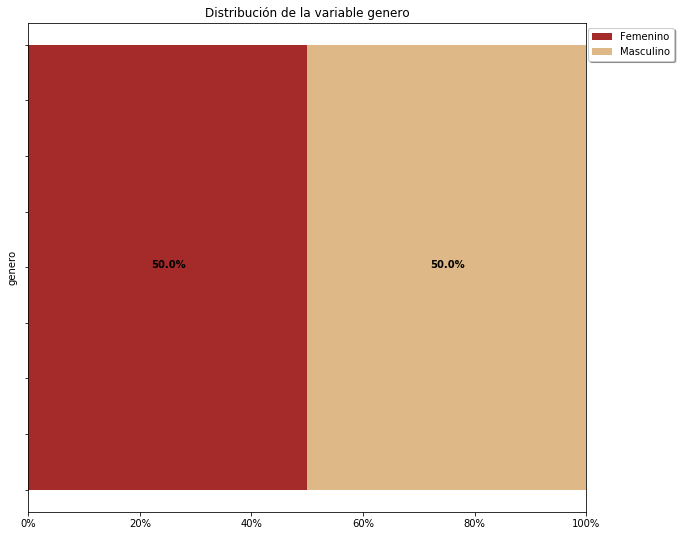

In [7]:
distribucion_variable_predecir(datos,"genero")


Problema equilibrado

In [8]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria}

In [9]:
def poder_predictivo_categorica(data:DataFrame, var:str, variable_predict:str):
    df = pd.crosstab(index= data[var],columns=data[variable_predict])
    df = df.div(df.sum(axis=1),axis=0)
    titulo = "Distribución de la variable %s según la variable %s" % (var,variable_predict)
    g = df.plot(kind='barh',stacked=True,legend = True, figsize = (10,9), \
                xlim = (0,1),title = titulo, width = 0.8)
    vals = g.get_xticks()
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)
    for bars in g.containers:
        plt.setp(bars, width=.9)
    for i in range(df.shape[0]):
        countv = 0 
        for v in df.iloc[i]:
            g.text(np.mean([countv,countv+v]) - 0.03, i , '{:.1%}'.format(v), color='black', fontweight='bold')
            countv = countv + v

In [10]:
def poder_predictivo_numerica(data:DataFrame, var:str, variable_predict:str):
    sns.FacetGrid(data, hue=variable_predict, height=6).map(sns.kdeplot, var, shade=True).add_legend()

2. Use Bosques Aleatorios, ADABoosting y XGBoosting en Python (con los par´ametros por defecto) para generar un modelo predictivo para la tabla voces.csv usando el 80 % de los datos para la tabla aprendizaje y un 20 % para la tabla testing, luego calcule para los datos de testing la matriz de confusi´on, la precisi´on global y la precisi´on para cada una de las dos categor´ıas. ¿Son buenos los resultados? Explique.

In [11]:
X = datos.iloc[:,:20] 
print(X.head())
y = datos.iloc[:,20:21] 
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.27586

In [12]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=10, random_state=0)

instancia_bosque.fit(X_train,y_train.iloc[:,0].values)

print("Las predicciones en Testing son: {}".format(instancia_bosque.predict(X_test)))


Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculin

In [13]:
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))



Matriz de Confusión:
[[297   4]
 [  8 325]]

Precisión Global:
0.9810725552050473

Error Global:
0.018927444794952675

Precisión por categoría:
   Femenino  Masculino
0  0.986711   0.975976


[0.01925904 0.11782454 0.00791809 0.1597916  0.01179789 0.15810167
 0.00646906 0.0086625  0.0367269  0.01307909 0.01046183 0.02314109
 0.36042914 0.00893751 0.00706416 0.00603186 0.01916278 0.01209636
 0.00571099 0.00733391]


([<matplotlib.axis.YTick at 0x1ff891ca488>,
 <a list of 20 Text yticklabel objects>)

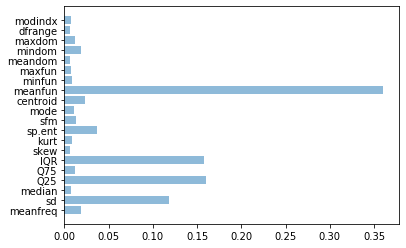

In [14]:
importancia = instancia_bosque.feature_importances_
print(importancia)
etiquetas = X_train.columns.values
y_pos = np.arange(len(etiquetas))
plt.barh(y_pos, importancia, align='center', alpha=0.5)
plt.yticks(y_pos, etiquetas)

In [15]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
print("Las predicciones en Testing son: {}".format(instancia_potenciacion.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculi

In [16]:
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[293   8]
 [  6 327]]

Precisión Global:
0.9779179810725552

Error Global:
0.02208201892744477

Precisión por categoría:
   Femenino  Masculino
0  0.973422   0.981982


[0.00000000e+00 1.65693205e-03 0.00000000e+00 1.05010633e-03
 5.44828510e-03 4.34151977e-02 0.00000000e+00 0.00000000e+00
 7.56876857e-04 5.06176267e-03 0.00000000e+00 1.52440581e-04
 9.37937428e-01 4.21144875e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.09522147e-04]


([<matplotlib.axis.YTick at 0x1ff89299248>,
 <a list of 20 Text yticklabel objects>)

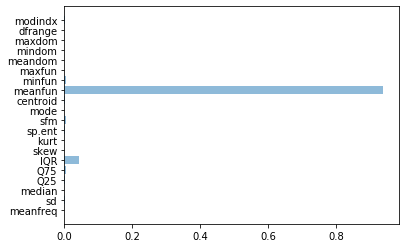

In [17]:
importancia = instancia_potenciacion.feature_importances_
print(importancia)
etiquetas = X_train.columns.values
y_pos = np.arange(len(etiquetas))
plt.barh(y_pos, importancia, align='center', alpha=0.5)
plt.yticks(y_pos, etiquetas)

In [18]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
print("Las predicciones en Testing son: {}".format(instancia_potenciacion.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculi

In [19]:
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[283  18]
 [  4 329]]

Precisión Global:
0.9652996845425867

Error Global:
0.034700315457413256

Precisión por categoría:
   Femenino  Masculino
0  0.940199   0.987988


[0.  0.1 0.  0.  0.  0.2 0.  0.  0.  0.1 0.  0.  0.4 0.1 0.  0.  0.  0.1
 0.  0. ]


([<matplotlib.axis.YTick at 0x1ff89357dc8>,
 <a list of 20 Text yticklabel objects>)

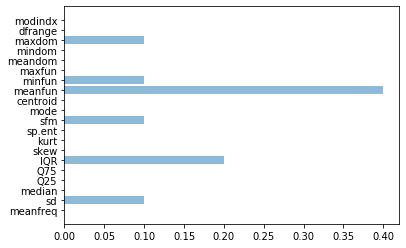

In [20]:
importancia = instancia_potenciacion.feature_importances_
print(importancia)
etiquetas = X_train.columns.values
y_pos = np.arange(len(etiquetas))
plt.barh(y_pos, importancia, align='center', alpha=0.5)
plt.yticks(y_pos, etiquetas)

Los resultados son muy buenos, en el caso de bosques se tiene un Precisión Global de 0.9810725552050473, y en cada categoria se tiene una precision tambien muy alta en Femenino es 0.986711 y Masculino es 0.975976. De la misma manera XGBoosting tiene una Precisión Global alta, no tanto, como bosques, pero elevada de 0.9779179810725552, y parecido a bosques por categoria Femenino 0.973422 y Masculino 0.981982. ADA finalmente muestra la precision mas baja pero sigue teniendo excelentes reusltados con una Precisión Global de 0.9652996845425867 y por categoria de Femenino 0.940199 y  Masculino 0.987988.

3. Usando la funci´on programada en el ejercicio 1 de la tarea anterior, los datos voces.csv y los modelos generados arriba construya un DataFrame de manera que en cada una de las filas aparezca un modelo predictivo y en las columnas aparezcan los ´ındices Precisi´on Global, Error Global Precisi´on Positiva (PP), Precisi´on Negativa (PN), Falsos Positivos (FP), los Falsos Negativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (AN). ¿Cu´al de los modelos es mejor para estos datos?

In [22]:
def indices_general_extra(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    precision_positiva = MC[1][1]/(MC[1][1] + MC[1][0])
    precision_negativa = MC[0][0]/(MC[0][0] + MC[0][1])
    falsos_positivos = 1 - precision_negativa
    falsos_negativos = 1 - precision_positiva
    asertividad_positiva = MC[1][1]/(MC[0][1] + MC[1][1])
    asertividad_negativa = MC[0][0]/(MC[0][0] + MC[1][0])
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria,
            "Precision Positiva (PP)": precision_positiva, 
            "Precision Negativa (PN)":precision_negativa, 
            "Falsos Positivos(FP)": falsos_positivos,
            "Falsos Negativos (FN)": falsos_negativos,
            "Asertividad Positiva (AP)": asertividad_positiva,
            "Asertividad Negativa (NP)": asertividad_negativa}

In [23]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=10, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))



Matriz de Confusión:
[[297   4]
 [  8 325]]

Precisión Global:
0.9810725552050473

Error Global:
0.018927444794952675

Precisión por categoría:
   Femenino  Masculino
0  0.986711   0.975976

Precision Positiva (PP):
0.975975975975976

Precision Negativa (PN):
0.9867109634551495

Falsos Positivos(FP):
0.013289036544850474

Falsos Negativos (FN):
0.024024024024024038

Asertividad Positiva (AP):
0.9878419452887538

Asertividad Negativa (NP):
0.9737704918032787


In [24]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[293   8]
 [  6 327]]

Precisión Global:
0.9779179810725552

Error Global:
0.02208201892744477

Precisión por categoría:
   Femenino  Masculino
0  0.973422   0.981982

Precision Positiva (PP):
0.9819819819819819

Precision Negativa (PN):
0.973421926910299

Falsos Positivos(FP):
0.02657807308970095

Falsos Negativos (FN):
0.018018018018018056

Asertividad Positiva (AP):
0.9761194029850746

Asertividad Negativa (NP):
0.979933110367893


In [25]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[283  18]
 [  4 329]]

Precisión Global:
0.9652996845425867

Error Global:
0.034700315457413256

Precisión por categoría:
   Femenino  Masculino
0  0.940199   0.987988

Precision Positiva (PP):
0.987987987987988

Precision Negativa (PN):
0.9401993355481728

Falsos Positivos(FP):
0.05980066445182719

Falsos Negativos (FN):
0.012012012012011963

Asertividad Positiva (AP):
0.9481268011527377

Asertividad Negativa (NP):
0.9860627177700348


In [27]:
A = np.matrix([[0.7413249211356467, 0.25867507886435326, 0.7717717717717718, 0.707641196013289, 0.292358803986711, 0.2282282282282282, 0.744927536231884, 0.7370242214532872],
               [0.9794952681388013, 0.02050473186119872, 0.975975975975976, 0.9833887043189369, 0.01661129568106312, 0.024024024024024038, 0.9848484848484849, 0.9736842105263158],
              [0.9605678233438486, 0.039432176656151396, 0.963963963963964, 0.9568106312292359, 0.04318936877076407, 0.036036036036036, 0.9610778443113772, 0.96],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.9006309148264984, 0.09936908517350163, 0.9519519519519519, 0.8438538205980066, 0.15614617940199338, 0.048048048048048075, 0.8708791208791209, 0.9407407407407408],
              [0.9668769716088328, 0.03312302839116721, 0.960960960960961, 0.973421926910299, 0.02657807308970095, 0.03903903903903905, 0.975609756097561, 0.9575163398692811],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.916403785488959, 0.08359621451104104, 0.987987987987988, 0.8372093023255814, 0.16279069767441856, 0.012012012012011963, 0.8703703703703703, 0.984375],
              [0.9810725552050473, 0.018927444794952675, 0.975975975975976, 0.9867109634551495, 0.013289036544850474, 0.024024024024024038, 0.9878419452887538, 0.9737704918032787],
              [0.9779179810725552, 0.02208201892744477, 0.9819819819819819, 0.973421926910299, 0.02657807308970095, 0.018018018018018056, 0.9761194029850746, 0.979933110367893],
              [0.9652996845425867, 0.034700315457413256, 0.987987987987988, 0.9401993355481728, 0.05980066445182719, 0.012012012012011963, 0.9481268011527377, 0.9860627177700348]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos todas variables","K-vecinos 6 variables","Arbol de Decision (default)","Arbol de Decision (criterion='entropy',max_depth=2)","Arbol de Decision (criterion='gini', splitter='random', max_depth=3)","Arbol de Decision 6 predictoras (default)","Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)","Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)", "Bosques", "XGBoosting", "ADA Boosting"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df


,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos todas variables,0.741325,0.258675,0.771772,0.707641,0.292359,0.228228,0.744928,0.737024
K-vecinos 6 variables,0.979495,0.020505,0.975976,0.983389,0.016611,0.024024,0.984848,0.973684
Arbol de Decision (default),0.960568,0.039432,0.963964,0.956811,0.043189,0.036036,0.961078,0.960000
"Arbol de Decision (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",0.900631,0.099369,0.951952,0.843854,0.156146,0.048048,0.870879,0.940741
Arbol de Decision 6 predictoras (default),0.966877,0.033123,0.960961,0.973422,0.026578,0.039039,0.975610,0.957516
"Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)",0.916404,0.083596,0.987988,0.837209,0.162791,0.012012,0.870370,0.984375
Bosques,0.981073,0.018927,0.975976,0.986711,0.013289,0.024024,0.987842,0.973770
XGBoosting,0.977918,0.022082,0.981982,0.973422,0.026578,0.018018,0.976119,0.979933


Para estos datos se denota aun que todos los metodos en general presentan buenos resultados que los resultados mas precisos son los de bosques aleatorios, su precision global es mas alta, es decir, logra identificar mejor los casos la PP y PN confirman esto, ademas los datos confundidas FP y FN son menores.

4. Repita los ejercicios 1-3, pero esta vez use una combinaci´on diferente de los par´ametros de los m´etodos. ¿Mejora la predicci´on?.

En este caso, ya que es una parte mas exploratoria, para comparar estos metodos se establece n_estimators=7, max_depth=2, random_state=0, esto con el fin de limitar significativamente el accionar del algoritmo y limitar a pocos estimadores y una profundidad limitada

In [28]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=7, max_depth=2, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[280  21]
 [  8 325]]

Precisión Global:
0.9542586750788643

Error Global:
0.045741324921135695

Precisión por categoría:
   Femenino  Masculino
0  0.930233   0.975976

Precision Positiva (PP):
0.975975975975976

Precision Negativa (PN):
0.9302325581395349

Falsos Positivos(FP):
0.06976744186046513

Falsos Negativos (FN):
0.024024024024024038

Asertividad Positiva (AP):
0.9393063583815029

Asertividad Negativa (NP):
0.9722222222222222


In [29]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=7, max_depth=2, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[296   5]
 [ 19 314]]

Precisión Global:
0.9621451104100947

Error Global:
0.03785488958990535

Precisión por categoría:
   Femenino  Masculino
0  0.983389   0.942943

Precision Positiva (PP):
0.9429429429429429

Precision Negativa (PN):
0.9833887043189369

Falsos Positivos(FP):
0.01661129568106312

Falsos Negativos (FN):
0.0570570570570571

Asertividad Positiva (AP):
0.9843260188087775

Asertividad Negativa (NP):
0.9396825396825397


In [30]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=7, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[279  22]
 [  4 329]]

Precisión Global:
0.9589905362776026

Error Global:
0.04100946372239744

Precisión por categoría:
   Femenino  Masculino
0   0.92691   0.987988

Precision Positiva (PP):
0.987987987987988

Precision Negativa (PN):
0.9269102990033222

Falsos Positivos(FP):
0.07308970099667778

Falsos Negativos (FN):
0.012012012012011963

Asertividad Positiva (AP):
0.9373219373219374

Asertividad Negativa (NP):
0.9858657243816255


In [31]:
A = np.matrix([[0.7413249211356467, 0.25867507886435326, 0.7717717717717718, 0.707641196013289, 0.292358803986711, 0.2282282282282282, 0.744927536231884, 0.7370242214532872],
               [0.9794952681388013, 0.02050473186119872, 0.975975975975976, 0.9833887043189369, 0.01661129568106312, 0.024024024024024038, 0.9848484848484849, 0.9736842105263158],
              [0.9605678233438486, 0.039432176656151396, 0.963963963963964, 0.9568106312292359, 0.04318936877076407, 0.036036036036036, 0.9610778443113772, 0.96],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.9006309148264984, 0.09936908517350163, 0.9519519519519519, 0.8438538205980066, 0.15614617940199338, 0.048048048048048075, 0.8708791208791209, 0.9407407407407408],
              [0.9668769716088328, 0.03312302839116721, 0.960960960960961, 0.973421926910299, 0.02657807308970095, 0.03903903903903905, 0.975609756097561, 0.9575163398692811],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.916403785488959, 0.08359621451104104, 0.987987987987988, 0.8372093023255814, 0.16279069767441856, 0.012012012012011963, 0.8703703703703703, 0.984375],
              [0.9810725552050473, 0.018927444794952675, 0.975975975975976, 0.9867109634551495, 0.013289036544850474, 0.024024024024024038, 0.9878419452887538, 0.9737704918032787],
              [0.9779179810725552, 0.02208201892744477, 0.9819819819819819, 0.973421926910299, 0.02657807308970095, 0.018018018018018056, 0.9761194029850746, 0.979933110367893],
              [0.9652996845425867, 0.034700315457413256, 0.987987987987988, 0.9401993355481728, 0.05980066445182719, 0.012012012012011963, 0.9481268011527377, 0.9860627177700348],
              [0.9542586750788643, 0.045741324921135695, 0.975975975975976, 0.9302325581395349, 0.06976744186046513, 0.024024024024024038, 0.9393063583815029, 0.9722222222222222],
              [0.9621451104100947, 0.03785488958990535, 0.9429429429429429, 0.9833887043189369, 0.01661129568106312, 0.0570570570570571, 0.9843260188087775, 0.9396825396825397],
              [0.9589905362776026, 0.04100946372239744, 0.987987987987988, 0.9269102990033222, 0.07308970099667778, 0.012012012012011963, 0.9373219373219374, 0.9858657243816255]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos todas variables","K-vecinos 6 variables","Arbol de Decision (default)","Arbol de Decision (criterion='entropy',max_depth=2)","Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",
                 "Arbol de Decision 6 predictoras (default)","Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)","Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)", 
                 "Bosques", "XGBoosting", "ADA Boosting", "Bosques (n_estimators=7, max_depth=2, random_state=0) ", "XGBoosting(n_estimators=7, max_depth=2, random_state=0)", "ADA Boosting (n_estimators=7, random_state=0)"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos todas variables,0.741325,0.258675,0.771772,0.707641,0.292359,0.228228,0.744928,0.737024
K-vecinos 6 variables,0.979495,0.020505,0.975976,0.983389,0.016611,0.024024,0.984848,0.973684
Arbol de Decision (default),0.960568,0.039432,0.963964,0.956811,0.043189,0.036036,0.961078,0.960000
"Arbol de Decision (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",0.900631,0.099369,0.951952,0.843854,0.156146,0.048048,0.870879,0.940741
Arbol de Decision 6 predictoras (default),0.966877,0.033123,0.960961,0.973422,0.026578,0.039039,0.975610,0.957516
"Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)",0.916404,0.083596,0.987988,0.837209,0.162791,0.012012,0.870370,0.984375
Bosques,0.981073,0.018927,0.975976,0.986711,0.013289,0.024024,0.987842,0.973770
XGBoosting,0.977918,0.022082,0.981982,0.973422,0.026578,0.018018,0.976119,0.979933


A pesar de limitarse los parametros, en este caso las estimaciones a pesar de no mejorar, no sufren realmente una bajada considerable en su nivel de precision

5. Repita los ejercicios 1-4, pero esta vez use 2 combinaciones diferentes de selecci´on de 6 variables predictoras. ¿Mejora la predicci´on?.

Para este ejercicio se usa primero la combinacion de: meanfun, IQR, Q25, sd, sp.ent, centroid; ya que es la mejor combinacion de bosques, debido a que XGBoosting muestra una cantidad limitada y que combina vagamente los dos otros metodos, se toman las mejores 6 de ADA: maxdom, minfun, meanfun, sfm, IQR, sd.
Para los parametros se emplearan los parametros n_estimators=700, max_depth=200, random_state=0 para darle mas margen a la funcion, y explorar este cambio

In [36]:
##Opcion 1
X = datos.iloc[:,[1,3,5,8,11,12]] 
print(X.head())
y = datos.iloc[:,20:21]
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

         sd       Q25       IQR    sp.ent  centroid   meanfun
0  0.064241  0.015071  0.075122  0.893369  0.059781  0.084279
1  0.067310  0.019414  0.073252  0.892193  0.066009  0.107937
2  0.083829  0.008701  0.123207  0.846389  0.077316  0.098706
3  0.072111  0.096582  0.111374  0.963322  0.151228  0.088965
4  0.079146  0.078720  0.127325  0.971955  0.135120  0.106398
      genero
0  Masculino
1  Masculino
2  Masculino
3  Masculino
4  Masculino


In [37]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=10, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[297   4]
 [  8 325]]

Precisión Global:
0.9810725552050473

Error Global:
0.018927444794952675

Precisión por categoría:
   Femenino  Masculino
0  0.986711   0.975976

Precision Positiva (PP):
0.975975975975976

Precision Negativa (PN):
0.9867109634551495

Falsos Positivos(FP):
0.013289036544850474

Falsos Negativos (FN):
0.024024024024024038

Asertividad Positiva (AP):
0.9878419452887538

Asertividad Negativa (NP):
0.9737704918032787


In [38]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[289  12]
 [  8 325]]

Precisión Global:
0.9684542586750788

Error Global:
0.03154574132492116

Precisión por categoría:
   Femenino  Masculino
0  0.960133   0.975976

Precision Positiva (PP):
0.975975975975976

Precision Negativa (PN):
0.9601328903654485

Falsos Positivos(FP):
0.039867109634551534

Falsos Negativos (FN):
0.024024024024024038

Asertividad Positiva (AP):
0.9643916913946587

Asertividad Negativa (NP):
0.9730639730639731


In [39]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[285  16]
 [ 11 322]]

Precisión Global:
0.9574132492113565

Error Global:
0.04258675078864349

Precisión por categoría:
   Femenino  Masculino
0  0.946844   0.966967

Precision Positiva (PP):
0.9669669669669669

Precision Negativa (PN):
0.946843853820598

Falsos Positivos(FP):
0.05315614617940201

Falsos Negativos (FN):
0.033033033033033066

Asertividad Positiva (AP):
0.9526627218934911

Asertividad Negativa (NP):
0.9628378378378378


In [40]:
###Diferentes parametros
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=700, max_depth=200, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[296   5]
 [  6 327]]

Precisión Global:
0.9826498422712934

Error Global:
0.017350157728706628

Precisión por categoría:
   Femenino  Masculino
0  0.983389   0.981982

Precision Positiva (PP):
0.9819819819819819

Precision Negativa (PN):
0.9833887043189369

Falsos Positivos(FP):
0.01661129568106312

Falsos Negativos (FN):
0.018018018018018056

Asertividad Positiva (AP):
0.9849397590361446

Asertividad Negativa (NP):
0.9801324503311258


In [41]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=700, max_depth=200, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))



Matriz de Confusión:
[[289  12]
 [ 10 323]]

Precisión Global:
0.9652996845425867

Error Global:
0.034700315457413256

Precisión por categoría:
   Femenino  Masculino
0  0.960133    0.96997

Precision Positiva (PP):
0.96996996996997

Precision Negativa (PN):
0.9601328903654485

Falsos Positivos(FP):
0.039867109634551534

Falsos Negativos (FN):
0.03003003003003002

Asertividad Positiva (AP):
0.9641791044776119

Asertividad Negativa (NP):
0.9665551839464883


In [42]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=700, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[284  17]
 [  6 327]]

Precisión Global:
0.9637223974763407

Error Global:
0.0362776025236593

Precisión por categoría:
   Femenino  Masculino
0  0.943522   0.981982

Precision Positiva (PP):
0.9819819819819819

Precision Negativa (PN):
0.9435215946843853

Falsos Positivos(FP):
0.056478405315614655

Falsos Negativos (FN):
0.018018018018018056

Asertividad Positiva (AP):
0.9505813953488372

Asertividad Negativa (NP):
0.9793103448275862


In [43]:
##Opcion 2
X = datos.iloc[:,[1,5,9,12,13,17]] 
print(X.head())
y = datos.iloc[:,20:21]
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


         sd       IQR       sfm   meanfun    minfun    maxdom
0  0.064241  0.075122  0.491918  0.084279  0.015702  0.007812
1  0.067310  0.073252  0.513724  0.107937  0.015826  0.054688
2  0.083829  0.123207  0.478905  0.098706  0.015656  0.015625
3  0.072111  0.111374  0.727232  0.088965  0.017798  0.562500
4  0.079146  0.127325  0.783568  0.106398  0.016931  5.484375
      genero
0  Masculino
1  Masculino
2  Masculino
3  Masculino
4  Masculino


In [44]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=10, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))



Matriz de Confusión:
[[294   7]
 [  7 326]]

Precisión Global:
0.9779179810725552

Error Global:
0.02208201892744477

Precisión por categoría:
   Femenino  Masculino
0  0.976744   0.978979

Precision Positiva (PP):
0.978978978978979

Precision Negativa (PN):
0.9767441860465116

Falsos Positivos(FP):
0.023255813953488413

Falsos Negativos (FN):
0.02102102102102099

Asertividad Positiva (AP):
0.978978978978979

Asertividad Negativa (NP):
0.9767441860465116


In [45]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))



Matriz de Confusión:
[[293   8]
 [  9 324]]

Precisión Global:
0.973186119873817

Error Global:
0.02681388012618302

Precisión por categoría:
   Femenino  Masculino
0  0.973422   0.972973

Precision Positiva (PP):
0.972972972972973

Precision Negativa (PN):
0.973421926910299

Falsos Positivos(FP):
0.02657807308970095

Falsos Negativos (FN):
0.027027027027026973

Asertividad Positiva (AP):
0.9759036144578314

Asertividad Negativa (NP):
0.9701986754966887


In [46]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))
    



Matriz de Confusión:
[[283  18]
 [  4 329]]

Precisión Global:
0.9652996845425867

Error Global:
0.034700315457413256

Precisión por categoría:
   Femenino  Masculino
0  0.940199   0.987988

Precision Positiva (PP):
0.987987987987988

Precision Negativa (PN):
0.9401993355481728

Falsos Positivos(FP):
0.05980066445182719

Falsos Negativos (FN):
0.012012012012011963

Asertividad Positiva (AP):
0.9481268011527377

Asertividad Negativa (NP):
0.9860627177700348


In [47]:
###Diferentes parametros
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=700, max_depth=200, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))



Matriz de Confusión:
[[295   6]
 [  8 325]]

Precisión Global:
0.9779179810725552

Error Global:
0.02208201892744477

Precisión por categoría:
   Femenino  Masculino
0  0.980066   0.975976

Precision Positiva (PP):
0.975975975975976

Precision Negativa (PN):
0.9800664451827242

Falsos Positivos(FP):
0.019933554817275767

Falsos Negativos (FN):
0.024024024024024038

Asertividad Positiva (AP):
0.9818731117824774

Asertividad Negativa (NP):
0.9735973597359736


In [48]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=700, max_depth=200, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[291  10]
 [ 12 321]]

Precisión Global:
0.9652996845425867

Error Global:
0.034700315457413256

Precisión por categoría:
   Femenino  Masculino
0  0.966777   0.963964

Precision Positiva (PP):
0.963963963963964

Precision Negativa (PN):
0.9667774086378738

Falsos Positivos(FP):
0.03322259136212624

Falsos Negativos (FN):
0.036036036036036

Asertividad Positiva (AP):
0.9697885196374623

Asertividad Negativa (NP):
0.9603960396039604


In [49]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=700, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[291  10]
 [  8 325]]

Precisión Global:
0.9716088328075709

Error Global:
0.028391167192429068

Precisión por categoría:
   Femenino  Masculino
0  0.966777   0.975976

Precision Positiva (PP):
0.975975975975976

Precision Negativa (PN):
0.9667774086378738

Falsos Positivos(FP):
0.03322259136212624

Falsos Negativos (FN):
0.024024024024024038

Asertividad Positiva (AP):
0.9701492537313433

Asertividad Negativa (NP):
0.9732441471571907


In [50]:
A = np.matrix([[0.7413249211356467, 0.25867507886435326, 0.7717717717717718, 0.707641196013289, 0.292358803986711, 0.2282282282282282, 0.744927536231884, 0.7370242214532872],
               [0.9794952681388013, 0.02050473186119872, 0.975975975975976, 0.9833887043189369, 0.01661129568106312, 0.024024024024024038, 0.9848484848484849, 0.9736842105263158],
              [0.9605678233438486, 0.039432176656151396, 0.963963963963964, 0.9568106312292359, 0.04318936877076407, 0.036036036036036, 0.9610778443113772, 0.96],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.9006309148264984, 0.09936908517350163, 0.9519519519519519, 0.8438538205980066, 0.15614617940199338, 0.048048048048048075, 0.8708791208791209, 0.9407407407407408],
              [0.9668769716088328, 0.03312302839116721, 0.960960960960961, 0.973421926910299, 0.02657807308970095, 0.03903903903903905, 0.975609756097561, 0.9575163398692811],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.916403785488959, 0.08359621451104104, 0.987987987987988, 0.8372093023255814, 0.16279069767441856, 0.012012012012011963, 0.8703703703703703, 0.984375],
              [0.9810725552050473, 0.018927444794952675, 0.975975975975976, 0.9867109634551495, 0.013289036544850474, 0.024024024024024038, 0.9878419452887538, 0.9737704918032787],
              [0.9779179810725552, 0.02208201892744477, 0.9819819819819819, 0.973421926910299, 0.02657807308970095, 0.018018018018018056, 0.9761194029850746, 0.979933110367893],
              [0.9652996845425867, 0.034700315457413256, 0.987987987987988, 0.9401993355481728, 0.05980066445182719, 0.012012012012011963, 0.9481268011527377, 0.9860627177700348],
              [0.9542586750788643, 0.045741324921135695, 0.975975975975976, 0.9302325581395349, 0.06976744186046513, 0.024024024024024038, 0.9393063583815029, 0.9722222222222222],
              [0.9621451104100947, 0.03785488958990535, 0.9429429429429429, 0.9833887043189369, 0.01661129568106312, 0.0570570570570571, 0.9843260188087775, 0.9396825396825397],
              [0.9589905362776026, 0.04100946372239744, 0.987987987987988, 0.9269102990033222, 0.07308970099667778, 0.012012012012011963, 0.9373219373219374, 0.9858657243816255],
              [0.9810725552050473, 0.018927444794952675, 0.975975975975976, 0.9867109634551495, 0.013289036544850474, 0.024024024024024038, 0.9878419452887538, 0.9737704918032787],
              [0.9684542586750788, 0.03154574132492116, 0.975975975975976, 0.9601328903654485, 0.039867109634551534, 0.024024024024024038, 0.9643916913946587, 0.9730639730639731],
              [0.9574132492113565, 0.04258675078864349, 0.9669669669669669, 0.946843853820598, 0.05315614617940201, 0.033033033033033066, 0.9526627218934911, 0.9628378378378378],
              [0.9826498422712934, 0.017350157728706628, 0.9819819819819819, 0.9833887043189369, 0.01661129568106312, 0.018018018018018056, 0.9849397590361446, 0.9801324503311258],
              [0.9652996845425867, 0.034700315457413256, 0.96996996996997, 0.9601328903654485, 0.039867109634551534, 0.03003003003003002, 0.9641791044776119, 0.9665551839464883],
              [0.9637223974763407, 0.0362776025236593, 0.9819819819819819, 0.9435215946843853, 0.056478405315614655, 0.018018018018018056, 0.9505813953488372, 0.9793103448275862],
              [0.9779179810725552, 0.02208201892744477, 0.978978978978979, 0.9767441860465116, 0.023255813953488413, 0.02102102102102099, 0.978978978978979, 0.9767441860465116],
              [0.973186119873817, 0.02681388012618302, 0.972972972972973, 0.973421926910299, 0.02657807308970095, 0.027027027027026973, 0.9759036144578314, 0.9701986754966887],
              [0.9652996845425867, 0.034700315457413256, 0.987987987987988, 0.9401993355481728, 0.05980066445182719, 0.012012012012011963, 0.9481268011527377, 0.9860627177700348],
              [0.9779179810725552, 0.02208201892744477, 0.975975975975976, 0.9800664451827242, 0.019933554817275767, 0.024024024024024038, 0.9818731117824774, 0.9735973597359736],
              [0.9652996845425867, 0.034700315457413256, 0.963963963963964, 0.9667774086378738, 0.03322259136212624, 0.036036036036036, 0.9697885196374623, 0.9603960396039604],
              [0.9716088328075709, 0.028391167192429068, 0.975975975975976, 0.9667774086378738, 0.03322259136212624, 0.024024024024024038, 0.9701492537313433, 0.9732441471571907]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos todas variables","K-vecinos 6 variables","Arbol de Decision (default)","Arbol de Decision (criterion='entropy',max_depth=2)","Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",
                 "Arbol de Decision 6 predictoras (default)","Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)","Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)", 
                 "Bosques", "XGBoosting", "ADA Boosting", "Bosques (n_estimators=7, max_depth=2, random_state=0) ", "XGBoosting(n_estimators=7, max_depth=2, random_state=0)", "ADA Boosting (n_estimators=7, random_state=0)",
                 "Bosques 6 predictoras (opcion 1)", "XGBoosting 6 predictoras (opcion 1)", "ADA Boosting 6 predictoras(opcion 1)",
                 "Bosques 6 predictoras (opcion 1)(n_estimators=700, max_depth=200, random_state=0)", "XGBoosting 6 predictoras (opcion 1)(n_estimators=700, max_depth=200, random_state=0)", "ADA Boosting 6 predictoras(opcion 1)(n_estimators=700, random_state=0)",
                 "Bosques 6 predictoras (opcion 2)", "XGBoosting 6 predictoras (opcion 2)", "ADA Boosting 6 predictoras(opcion 2)",
                 "Bosques 6 predictoras (opcion 2)(n_estimators=700, max_depth=200, random_state=0)", "XGBoosting 6 predictoras (opcion 2)(n_estimators=700, max_depth=200, random_state=0)", "ADA Boosting 6 predictoras(opcion 2)(n_estimators=700, random_state=0)"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos todas variables,0.741325,0.258675,0.771772,0.707641,0.292359,0.228228,0.744928,0.737024
K-vecinos 6 variables,0.979495,0.020505,0.975976,0.983389,0.016611,0.024024,0.984848,0.973684
Arbol de Decision (default),0.960568,0.039432,0.963964,0.956811,0.043189,0.036036,0.961078,0.960000
"Arbol de Decision (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",0.900631,0.099369,0.951952,0.843854,0.156146,0.048048,0.870879,0.940741
Arbol de Decision 6 predictoras (default),0.966877,0.033123,0.960961,0.973422,0.026578,0.039039,0.975610,0.957516
"Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)",0.916404,0.083596,0.987988,0.837209,0.162791,0.012012,0.870370,0.984375
Bosques,0.981073,0.018927,0.975976,0.986711,0.013289,0.024024,0.987842,0.973770
XGBoosting,0.977918,0.022082,0.981982,0.973422,0.026578,0.018018,0.976119,0.979933


Para estos datos se denota que todos los metodos en general presentan buenos resultados. Los resultados mas precisos son los de bosques aleatorios, de hecho, el modelo de 6 variables predictoras Bosques 6 predictoras (opcion 1)(n_estimators=700, max_depth=200, random_state=0), donde las variables son: meanfun, IQR, Q25, sd, sp.ent, centroid. Tiene la precision global mas alta de 0.982650, es decir, logra identificar mejor los casos la PP y PN confirman esto, ademas los datos confundidas FP y FN son menores.

Ejercicio 2: [30 puntos] Esta pregunta utiliza los datos (tumores.csv). Se trata de un conjunto de datos de caracter´ısticas del tumor cerebral que incluye cinco variables de primer orden y ocho de textura y cuatro par´ametros de evaluaci´on de la calidad con el nivel objetivo. La variables son: Media, Varianza, Desviaci´on est´andar, Asimetr´ıa, Kurtosis, Contraste, Energ´ıa, ASM (segundo momento angular), Entrop´ıa, Homogeneidad, Disimilitud, Correlaci´on, Grosor, PSNR (Pico de la relaci´on se˜nal-ruido), SSIM (´Indice de Similitud Estructurada), MSE (Mean Square Error), DC (Coeficiente de Dados) y la variable a predecir tipo (1 = Tumor, 0 = No-Tumor).
Realice lo siguiente:

1. Use Bosques Aleatorios, ADABoosting y XGBoosting en Python para generar un modelo predictivo para la tabla tumores.csv usando el 70 % de los datos para la tabla aprendizaje y un 30 % para la tabla testing.

In [51]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('tumores.csv',delimiter=',',decimal=".")
datos['imagen'] = datos['imagen'].astype('category')
print(datos.shape)
print(datos.head())
print(datos.info())

C:\Users\rzamoram\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(1275, 18)
   imagen      media     varianza  desviacion.estandar  entropia  asimetria  \
0  Image1  23.448517  2538.985627            50.388348  0.651174   1.984202   
1  Image2   4.398331   834.853030            28.893823  0.953532   6.495203   
2  Image3   3.244263   642.059166            25.338886  0.966065   7.772860   
3  Image4   8.511353  1126.214187            33.559115  0.868765   3.763142   
4  Image5  21.000793  2235.316978            47.279139  0.684724   1.936029   

    kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
0   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
1  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
2  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
3  15.107579  362.291213  0.921786  0.849690      0.949295     2.765725   
4   4.722343  312.439226  0.804184  0.646711      0.8

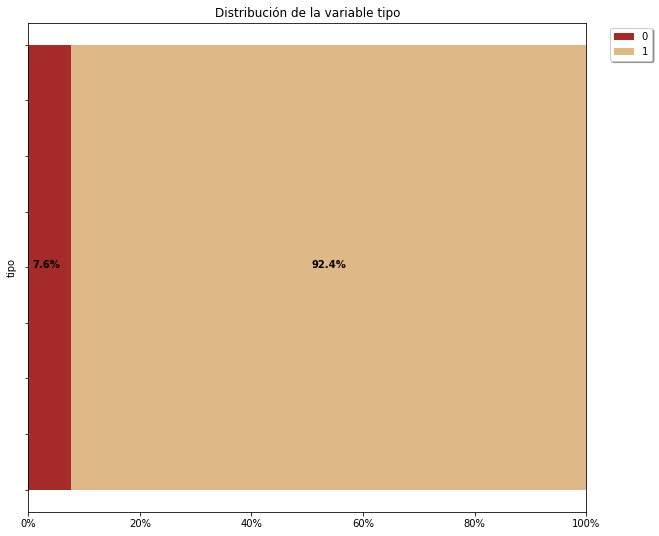

In [52]:
distribucion_variable_predecir(datos,"tipo")

Problema muy desequilibrado

In [53]:
X = datos.iloc[:,1:17] 
print(X.head())
y = datos.iloc[:,17:18] 
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

       media     varianza  desviacion.estandar  entropia  asimetria  \
0  23.448517  2538.985627            50.388348  0.651174   1.984202   
1   4.398331   834.853030            28.893823  0.953532   6.495203   
2   3.244263   642.059166            25.338886  0.966065   7.772860   
3   8.511353  1126.214187            33.559115  0.868765   3.763142   
4  21.000793  2235.316978            47.279139  0.684724   1.936029   

    kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
0   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
1  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
2  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
3  15.107579  362.291213  0.921786  0.849690      0.949295     2.765725   
4   4.722343  312.439226  0.804184  0.646711      0.880301     3.006660   

   correlacion        psnr      ssim       mse        dc  
0     0.968576   97.974630  0.777011  0.171163  0.303989  
1   

In [54]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=10, random_state=0)

instancia_bosque.fit(X_train,y_train.iloc[:,0].values)

print("Las predicciones en Testing son: {}".format(instancia_bosque.predict(X_test)))

Las predicciones en Testing son: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 30   3]
 [  4 346]]

Precisión Global:
0.9817232375979112

Error Global:
0.018276762402088753

Precisión por categoría:
          0         1
0  0.909091  0.988571

Precision Positiva (PP):
0.9885714285714285

Precision Negativa (PN):
0.9090909090909091

Falsos Positivos(FP):
0.09090909090909094

Falsos Negativos (FN):
0.011428571428571455

Asertividad Positiva (AP):
0.9914040114613181

Asertividad Negativa (NP):
0.8823529411764706


[0.02356101 0.0463508  0.01405155 0.05246964 0.01572265 0.0375766
 0.0027295  0.00843819 0.00740019 0.04603719 0.01636483 0.02320525
 0.02936465 0.05954844 0.02948095 0.58769855]


([<matplotlib.axis.YTick at 0x1ff83a90e88>,
 <a list of 16 Text yticklabel objects>)

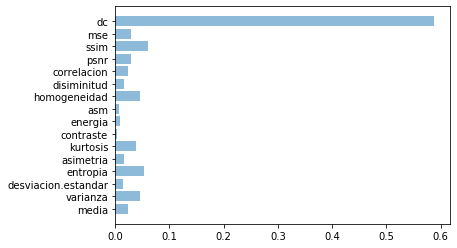

In [56]:
importancia = instancia_bosque.feature_importances_
print(importancia)
etiquetas = X_train.columns.values
y_pos = np.arange(len(etiquetas))
plt.barh(y_pos, importancia, align='center', alpha=0.5)
plt.yticks(y_pos, etiquetas)

In [57]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
print("Las predicciones en Testing son: {}".format(instancia_potenciacion.predict(X_test)))

Las predicciones en Testing son: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [58]:
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 26   7]
 [  2 348]]

Precisión Global:
0.9765013054830287

Error Global:
0.023498694516971286

Precisión por categoría:
          0         1
0  0.787879  0.994286

Precision Positiva (PP):
0.9942857142857143

Precision Negativa (PN):
0.7878787878787878

Falsos Positivos(FP):
0.21212121212121215

Falsos Negativos (FN):
0.005714285714285672

Asertividad Positiva (AP):
0.9802816901408451

Asertividad Negativa (NP):
0.9285714285714286


[0.         0.         0.         0.02537333 0.04276316 0.
 0.         0.01464124 0.03340622 0.01148433 0.01080906 0.01249665
 0.02512731 0.01984939 0.04526759 0.75878172]


([<matplotlib.axis.YTick at 0x1ff89653c08>,
 <a list of 16 Text yticklabel objects>)

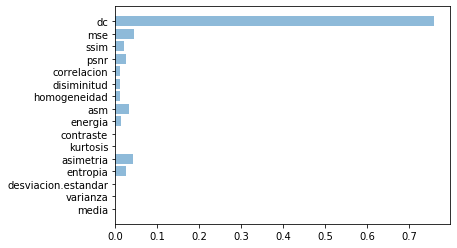

In [59]:
importancia = instancia_potenciacion.feature_importances_
print(importancia)
etiquetas = X_train.columns.values
y_pos = np.arange(len(etiquetas))
plt.barh(y_pos, importancia, align='center', alpha=0.5)
plt.yticks(y_pos, etiquetas)

In [60]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
print("Las predicciones en Testing son: {}".format(instancia_potenciacion.predict(X_test)))

Las predicciones en Testing son: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [61]:
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 30   3]
 [  3 347]]

Precisión Global:
0.9843342036553525

Error Global:
0.015665796344647487

Precisión por categoría:
          0         1
0  0.909091  0.991429

Precision Positiva (PP):
0.9914285714285714

Precision Negativa (PN):
0.9090909090909091

Falsos Positivos(FP):
0.09090909090909094

Falsos Negativos (FN):
0.008571428571428563

Asertividad Positiva (AP):
0.9914285714285714

Asertividad Negativa (NP):
0.9090909090909091


[0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.1 0.3 0.1 0.  0.1]


([<matplotlib.axis.YTick at 0x1ff8a733b88>,
 <a list of 16 Text yticklabel objects>)

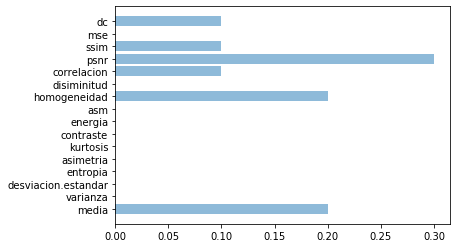

In [62]:
importancia = instancia_potenciacion.feature_importances_
print(importancia)
etiquetas = X_train.columns.values
y_pos = np.arange(len(etiquetas))
plt.barh(y_pos, importancia, align='center', alpha=0.5)
plt.yticks(y_pos, etiquetas)

2. Usando la funci´on programada en el ejercicio 1 de la tarea anterior, los datos tumores.csv y los modelos generados arriba construya un DataFrame de manera que en cada una de las filas aparezca un modelo predictivo y en las columnas aparezcan los ´ındices Precisi´on Global, Error Global Precisi´on Positiva (PP), Precisi´on Negativa (PN), Falsos Positivos (FP), los Falsos Negativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (AN). ¿Cu´al de los modelos es mejor para estos datos?

In [63]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=10, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 30   3]
 [  4 346]]

Precisión Global:
0.9817232375979112

Error Global:
0.018276762402088753

Precisión por categoría:
          0         1
0  0.909091  0.988571

Precision Positiva (PP):
0.9885714285714285

Precision Negativa (PN):
0.9090909090909091

Falsos Positivos(FP):
0.09090909090909094

Falsos Negativos (FN):
0.011428571428571455

Asertividad Positiva (AP):
0.9914040114613181

Asertividad Negativa (NP):
0.8823529411764706


In [64]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 26   7]
 [  2 348]]

Precisión Global:
0.9765013054830287

Error Global:
0.023498694516971286

Precisión por categoría:
          0         1
0  0.787879  0.994286

Precision Positiva (PP):
0.9942857142857143

Precision Negativa (PN):
0.7878787878787878

Falsos Positivos(FP):
0.21212121212121215

Falsos Negativos (FN):
0.005714285714285672

Asertividad Positiva (AP):
0.9802816901408451

Asertividad Negativa (NP):
0.9285714285714286


In [65]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=10, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 30   3]
 [  3 347]]

Precisión Global:
0.9843342036553525

Error Global:
0.015665796344647487

Precisión por categoría:
          0         1
0  0.909091  0.991429

Precision Positiva (PP):
0.9914285714285714

Precision Negativa (PN):
0.9090909090909091

Falsos Positivos(FP):
0.09090909090909094

Falsos Negativos (FN):
0.008571428571428563

Asertividad Positiva (AP):
0.9914285714285714

Asertividad Negativa (NP):
0.9090909090909091


In [66]:
A = np.matrix([[0.8981723237597912, 0.10182767624020883, 0.9742857142857143, 0.09090909090909091, 0.9090909090909091, 0.02571428571428569, 0.9191374663072777, 0.25],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091],
               [0.9817232375979112, 0.018276762402088753, 0.9885714285714285, 0.9090909090909091, 0.09090909090909094, 0.011428571428571455, 0.9914040114613181, 0.8823529411764706],
               [0.9765013054830287, 0.023498694516971286, 0.9942857142857143, 0.7878787878787878, 0.21212121212121215, 0.005714285714285672, 0.9802816901408451, 0.9285714285714286],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos", "Arbol de Decision", "Bosques aleatorios", "XGBoosting", "ADA Boosting"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos,0.898172,0.101828,0.974286,0.090909,0.909091,0.025714,0.919137,0.250000
Arbol de Decision,0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091
Bosques aleatorios,0.981723,0.018277,0.988571,0.909091,0.090909,0.011429,0.991404,0.882353
XGBoosting,0.976501,0.023499,0.994286,0.787879,0.212121,0.005714,0.980282,0.928571
ADA Boosting,0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091


De la tarea 1 de k-vecinos se debe notar que los 4 algoritmos generaron el mismo resultado, por lo que se toma como un resultado default para evitar confusion de interpretacion. La precision global fue de 0.8981723237597912 y la precision global por categoria fue de 0.090909 para el caso de No tumor y 0.974286 para el caso de Si tumor. En el caso de bayes para este ejercicio funciono mucho mejor con una precision global de 0.9843342036553525 y por categoria de 0.909091 y 0.991429 es decir, identifica mejor los casos con ciertos errores de datos confundidos. curiosamente con ADA Boosting ocurre justamente la misma estimacion por lo que estos dos metodos son los que mejor predicen los datos de los tumores. Pero cabe destacar que XGBoosting es el que menor cantidad de tumores clasifica como no tumores por lo que en dado caso este modelo tambien funcionaria bien y quizas mejor para efectos del problema. 

3. Repita los ejercicios 1-2, pero esta vez use una combinaci´on de los par´ametros del m´etodo de cada uno de los m´etodos citados arriba. ¿Mejora la predicci´on?

Para este caso viendo lo que sucedio en los ejercicios anteriores parece que entre mayor cantidad de estimadores y profundidad maxima sirve mejor por lo que estos son los parametros que parecen formar la gran combinacion (n_estimators=1000, max_depth=250, random_state=0)

In [67]:
##Bosques
instancia_bosque = RandomForestClassifier(n_estimators=1000, max_depth=250, random_state=0)
instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 33   0]
 [  3 347]]

Precisión Global:
0.9921671018276762

Error Global:
0.007832898172323799

Precisión por categoría:
     0         1
0  1.0  0.991429

Precision Positiva (PP):
0.9914285714285714

Precision Negativa (PN):
1.0

Falsos Positivos(FP):
0.0

Falsos Negativos (FN):
0.008571428571428563

Asertividad Positiva (AP):
1.0

Asertividad Negativa (NP):
0.9166666666666666


In [68]:
###XGBoosting
instancia_potenciacion = GradientBoostingClassifier(n_estimators=1000, max_depth=250, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 30   3]
 [  3 347]]

Precisión Global:
0.9843342036553525

Error Global:
0.015665796344647487

Precisión por categoría:
          0         1
0  0.909091  0.991429

Precision Positiva (PP):
0.9914285714285714

Precision Negativa (PN):
0.9090909090909091

Falsos Positivos(FP):
0.09090909090909094

Falsos Negativos (FN):
0.008571428571428563

Asertividad Positiva (AP):
0.9914285714285714

Asertividad Negativa (NP):
0.9090909090909091


In [69]:
###ADA Boosting
instancia_potenciacion = AdaBoostClassifier(n_estimators=1000, random_state=0)
instancia_potenciacion.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_potenciacion.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general_extra(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 31   2]
 [  3 347]]

Precisión Global:
0.9869451697127938

Error Global:
0.01305483028720622

Precisión por categoría:
          0         1
0  0.939394  0.991429

Precision Positiva (PP):
0.9914285714285714

Precision Negativa (PN):
0.9393939393939394

Falsos Positivos(FP):
0.06060606060606055

Falsos Negativos (FN):
0.008571428571428563

Asertividad Positiva (AP):
0.994269340974212

Asertividad Negativa (NP):
0.9117647058823529


In [70]:
A = np.matrix([[0.8981723237597912, 0.10182767624020883, 0.9742857142857143, 0.09090909090909091, 0.9090909090909091, 0.02571428571428569, 0.9191374663072777, 0.25],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091],
               [0.9817232375979112, 0.018276762402088753, 0.9885714285714285, 0.9090909090909091, 0.09090909090909094, 0.011428571428571455, 0.9914040114613181, 0.8823529411764706],
               [0.9765013054830287, 0.023498694516971286, 0.9942857142857143, 0.7878787878787878, 0.21212121212121215, 0.005714285714285672, 0.9802816901408451, 0.9285714285714286],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091],
               [0.9921671018276762, 0.007832898172323799, 0.9914285714285714, 1.0, 0.0, 0.008571428571428563, 1.0, 0.9166666666666666],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091],
               [0.9869451697127938, 0.01305483028720622, 0.9914285714285714, 0.9393939393939394, 0.06060606060606055, 0.008571428571428563, 0.994269340974212, 0.9117647058823529]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos", "Arbol de Decision", "Bosques aleatorios", "XGBoosting", "ADA Boosting", "Bosques aleatorios (n_estimators=1000, max_depth=250, random_state=0)", "XGBoosting (n_estimators=1000, max_depth=250, random_state=0)", "ADA Boosting (n_estimators=1000, random_state=0)"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos,0.898172,0.101828,0.974286,0.090909,0.909091,0.025714,0.919137,0.250000
Arbol de Decision,0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091
Bosques aleatorios,0.981723,0.018277,0.988571,0.909091,0.090909,0.011429,0.991404,0.882353
XGBoosting,0.976501,0.023499,0.994286,0.787879,0.212121,0.005714,0.980282,0.928571
ADA Boosting,0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091
"Bosques aleatorios (n_estimators=1000, max_depth=250, random_state=0)",0.992167,0.007833,0.991429,1.000000,0.000000,0.008571,1.000000,0.916667
"XGBoosting (n_estimators=1000, max_depth=250, random_state=0)",0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091
"ADA Boosting (n_estimators=1000, random_state=0)",0.986945,0.013055,0.991429,0.939394,0.060606,0.008571,0.994269,0.911765


En este caso, cambiando los parametros dando un estimador de 1000 con una profundidad de 250, el metodo de Bosques aleatorios arroja una precision global de 0.992167 que lo convierte en la prediccion mas acertada. Pero cabe resaltar que los tumores identificados como no tumores no cambian respecto a los otros dos metodos.

Pregunta 3: [30 puntos] La idea de este ejercicio es programar una Clase en Python para un nuevo m´etodo de Consenso Propio, esto basado en los m´etodos K-vecinos m´as cercanos, Arbo- ´ les de Decisi´on, M´etodo de Potenciaci´on (XGBoosting) y M´etodo de Potenciaci´on (ADABoosting), para esto realice los siguiente:

1. Programe una Clase en Python denominada ConsensoPropio que tiene, adem´as del constructor, al menos los siguientes m´etodos fit(X train, y train, ...) que recibe la tabla de entrenamiento y genera 4 muestras aleatorias con reemplazo (Boostraps) de los
datos de aprendizaje y luego aplica en cada una de estas muestras uno de los m´etodos predictivos mencionados arriba. Este m´etodo debe generar un nuevo modelo predictivo que es un atributo de clase, tipo diccionario, que incluya los 4 modelos  generados (todos los m´etodos usar´an todas las variables) y las 4 de precisiones globales, respectivamente de cada modelo1 , que denotamos por (P G1, P G2, . . . , P G4), donde 0 ≤ P Gj ≤ 1 para j = 1, 2, . . . , 4.

In [71]:
class ConsensoPropio:
    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    def fit(self):
        # parte descriptiva
        X = self.dataset.drop(['genero'],axis=1)
        Y = self.dataset['genero'].where(self.dataset['genero']==1,-1)
        # los pesos 
        evalua = pd.DataFrame(Y.copy())
        evalua['weights'] = 1/len(self.dataset) 
        # corre el algoritmo
        alphas = [] 
        models = []
        for t in range(self.T):
            
            ##Arbol de decision
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1) 
            model = Tree_model.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            models.append(model)
            predictions = model.predict(X)
            score = model.score(X,Y)
            evalua['predictions'] = predictions
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha = np.log((1-err)/err)
            alphas.append(alpha)
            evalua['weights'] *= np.exp(alpha*evalua['misclassified'])
            
            ##Kneighbors
            kneighbor = KNeighborsClassifier(n_neighbors=3)
            model2 = kneighbor.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            model2.append(model2)
            predictions2 = model2.predict(X)
            score2 = model2.score(X,Y)
            evalua['predictions'] = predictions2
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy2 = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification2 = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err2 = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha2 = np.log((1-err2)/err2)
            alphas2.append(alpha2)
            evalua['weights'] *= np.exp(alpha2*evalua['misclassified'])
            
            ###XGBoosting
            xgboosting = GradientBoostingClassifier(n_estimators=10, random_state=0)
            model3 = xgboosting.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            model3.append(model3)
            predictions3 = model3.predict(X)
            score3 = model3.score(X,Y)
            evalua['predictions'] = predictions3
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy3 = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification3 = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err3 = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha3 = np.log((1-err3)/err3)
            alphas3.append(alpha3)
            evalua['weights'] *= np.exp(alpha3*evalua['misclassified'])      
        
            ###ADA Boosting
            ada = AdaBoostClassifier(n_estimators=10, random_state=0)
            model4 = ada.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            model4.append(model4)
            predictions4 = model4.predict(X)
            score4 = model4.score(X,Y)
            evalua['predictions'] = predictions4
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy4 = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification4 = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err4 = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha4 = np.log((1-err4)/err4)
            alphas4.append(alpha4)
            evalua['weights'] *= np.exp(alpha4*evalua['misclassified'])
        
        
        self.alphas = alphas
        self.models = models
        
        self.alpha2 = alpha2
        self.models2 = model2
        
        self.alpha3 = alpha3
        self.models3 = model3
        
        self.alpha4 = alpha4
        self.models4 = model4

2. Programe una funci´on predict(X test) que recibe la tabla de testing. Luego, para predecir aplica en cada una de las filas de la tabla de testing los 4 modelos predictivos que est´an almacenados dentro de la Clase en el atributo incluido para este efecto; y se establece un consenso de todos los resultados. Se debe programar una f´ormula en Python que le d´e mayor importancia a los m´etodos con mejor precisi´on global. Si denotamos por Mj (h, i) la probabilidad que retorna el j-´esimo modelo en el individuo i-´esimo para la categor´ıa h de variable a predecir, donde j var´ıa de 1 hasta 4, h var´ıa desde 1 hasta p=n´umero de categor´ıas de la variable a predecir e i var´ıa de 1 hasta s = cantidad de individuos en la tabla de testing, esta f´ormula de define como sigue:

In [72]:
class ConsensoPropio:
    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    def fit(self):
        # parte descriptiva
        X = self.dataset.drop(['genero'],axis=1)
        Y = self.dataset['genero'].where(self.dataset['genero']==1,-1)
        # los pesos 
        evalua = pd.DataFrame(Y.copy())
        evalua['weights'] = 1/len(self.dataset) 
        # corre el algoritmo
        alphas = [] 
        models = []
        for t in range(self.T):
            
            ##Arbol de decision
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1) 
            model = Tree_model.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            models.append(model)
            predictions = model.predict(X)
            score = model.score(X,Y)
            evalua['predictions'] = predictions
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha = np.log((1-err)/err)
            alphas.append(alpha)
            evalua['weights'] *= np.exp(alpha*evalua['misclassified'])
            
            ##Kneighbors
            kneighbor = KNeighborsClassifier(n_neighbors=3)
            model2 = kneighbor.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            model2.append(model2)
            predictions2 = model2.predict(X)
            score2 = model2.score(X,Y)
            evalua['predictions'] = predictions2
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy2 = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification2 = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err2 = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha2 = np.log((1-err2)/err2)
            alphas2.append(alpha2)
            evalua['weights'] *= np.exp(alpha2*evalua['misclassified'])
            
            ###XGBoosting
            xgboosting = GradientBoostingClassifier(n_estimators=10, random_state=0)
            model3 = xgboosting.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            model3.append(model3)
            predictions3 = model3.predict(X)
            score3 = model3.score(X,Y)
            evalua['predictions'] = predictions3
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy3 = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification3 = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err3 = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha3 = np.log((1-err3)/err3)
            alphas3.append(alpha3)
            evalua['weights'] *= np.exp(alpha3*evalua['misclassified'])      
        
            ###ADA Boosting
            ada = AdaBoostClassifier(n_estimators=10, random_state=0)
            model4 = ada.fit(X,Y,sample_weight=np.array(evalua['weights'])) 
            model4.append(model4)
            predictions4 = model4.predict(X)
            score4 = model4.score(X,Y)
            evalua['predictions'] = predictions4
            evalua['evalua'] = np.where(evalua['predictions'] == evalua['target'],1,0)
            evalua['misclassified'] = np.where(evalua['predictions'] != evalua['target'],1,0)
            accuracy4 = sum(evalua['evalua'])/len(evalua['evalua'])
            misclassification4 = sum(evalua['misclassified'])/len(evalua['misclassified'])
            err4 = np.sum(evalua['weights']*evalua['misclassified'])/np.sum(evalua['weights'])
            alpha4 = np.log((1-err4)/err4)
            alphas4.append(alpha4)
            evalua['weights'] *= np.exp(alpha4*evalua['misclassified'])
        
        
        self.alphas = alphas
        self.models = models
        
        self.alpha2 = alpha2
        self.models2 = model2
        
        self.alpha3 = alpha3
        self.models3 = model3
        
        self.alpha4 = alpha4
        self.models4 = model4
            
    def predict(self):
        X_test = self.test_dataset.drop(['genero'],axis=1).reindex(range(len(self.test_dataset)))
        Y_test = self.test_dataset['genero'].reindex(range(len(self.test_dataset))).where(self.dataset['genero']==1,-1)
        
        accuracy = []
        predictions = []
        
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha*model.predict(X_test) # We use the predict method for the single decisiontreeclassifier models in the list
            predictions.append(prediction)
            self.accuracy.append(np.sum(np.sign(np.sum(np.array(predictions),axis=0))==Y_test.values)/len(predictions[0]))
            
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))

3. Usando la tabla de datos voces.csv genere al azar una tabla de testing con un 20 % de los datos y con el resto de los datos construya una tabla de aprendizaje.

In [73]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('voces.csv',delimiter=',',decimal=".")
print(datos.shape)
print(datos.head())
print(datos.info())

C:\Users\rzamoram\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     ma

4. Genere modelos predictivos usando la Clase ConsensoPropio y el m´etodo fit de la clase RandomForestClassifier (con solamente 4 ´arboles, es decir, 4 boostraps), luego para la tabla de testing calcule, para ambos m´etodos, calcule la precisi´on global, el error global y la precisi´on por clases. ¿Cu´al m´etodo es mejor?


In [74]:
##Bosques
X = datos.iloc[:,:20] 
print(X.head())
y = datos.iloc[:,20:21] 
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

instancia_bosque = RandomForestClassifier(n_estimators=10, random_state=0)

instancia_bosque.fit(X_train,y_train.iloc[:,0].values)
prediccion = instancia_bosque.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.27586

In [77]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
dataset = pd.read_csv('voces.csv',delimiter=',',decimal=".")
print(dataset.shape)
print(dataset.head())
print(dataset.info())

ConsensoPropio(dataset,10,dataset)

C:\Users\rzamoram\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     ma

Random forrest predice un 0.9810725552050473 correctamente, dada esta estimacion y viendo que con consenso propio se predice con la clase programada 0.990 con kvecinos, 0.891 con arboles, 0.889 en xgboosting y 0.127 en ada boosting. RandomForrest estimado con el algoritmo de python resulta mejor estimacion para el caso de voces.